In [1]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas numpy nltk textblob matplotlib seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import streamlit as st
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
file_path = 'job_descriptions.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

In [8]:
# Streamlit App
st.set_page_config(page_title="Job Insights Dashboard", layout="wide")


In [9]:
# Sidebar - Filters
st.sidebar.header("Filters")
job_title_filter = st.sidebar.selectbox("Select Job Title", ["All"] + list(data["Job_Title"].unique()))
experience_filter = st.sidebar.selectbox("Select Experience Level", ["All"] + list(data["Experience_Level"].unique()))
location_filter = st.sidebar.selectbox("Select Location", ["All"] + list(data["Location"].unique()))
industry_filter = st.sidebar.selectbox("Select Industry", ["All"] + list(data["Industry"].unique()))

2024-12-05 10:29:32.059 
  command:

    streamlit run /usr/local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [10]:
# Apply Filters
filtered_data = data.copy()
if job_title_filter != "All":
    filtered_data = filtered_data[filtered_data["Job_Title"] == job_title_filter]
if experience_filter != "All":
    filtered_data = filtered_data[filtered_data["Experience_Level"] == experience_filter]
if location_filter != "All":
    filtered_data = filtered_data[filtered_data["Location"] == location_filter]
if industry_filter != "All":
    filtered_data = filtered_data[filtered_data["Industry"] == industry_filter]

# Main Page
st.title("Job Insights Dashboard")
st.markdown("Use the filters on the left to customize your insights.")


DeltaGenerator()

DeltaGenerator()

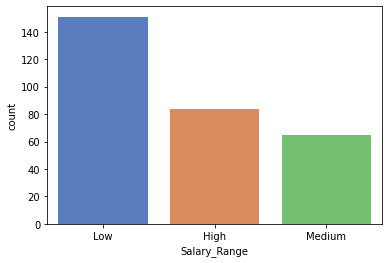

In [11]:
# Visualization 1: Salary Range Distribution
st.subheader("Salary Range Distribution")
salary_dist = sns.countplot(data=filtered_data, x="Salary_Range", order=data["Salary_Range"].value_counts().index, palette="muted")
st.pyplot(salary_dist.figure)


DeltaGenerator()

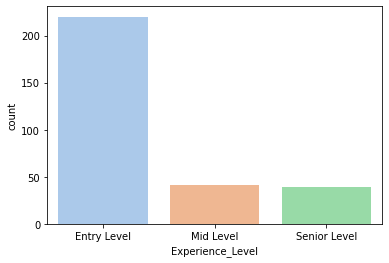

In [12]:
# Visualization 2: Experience Level Breakdown
st.subheader("Experience Level Breakdown")
exp_level_dist = sns.countplot(data=filtered_data, x="Experience_Level", order=data["Experience_Level"].value_counts().index, palette="pastel")
st.pyplot(exp_level_dist.figure)

In [16]:
# Tooltips
with st.expander("How to Use This Dashboard"):
    st.write("""
    - **Filters**: Use the sidebar to filter the data by job title, experience level, location, and industry.
    - **Salary Range Distribution**: View the distribution of jobs across different salary ranges.
    - **Experience Level Breakdown**: Analyze the proportion of jobs based on experience level.
    - **Word Cloud**: See the most frequently required skills for the filtered jobs.
    """)